In [ ]:
!pip install torch torchvision matplotlib kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

**Imports**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
import os
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

train_path = "/content/drive/MyDrive/BrainTumor/Training"
test_path = "/content/drive/MyDrive/BrainTumor/Testing"

In [ ]:

train_dataset = ImageFolder(root=train_path)
num_classes = len(train_dataset.classes)
print(f"Detected {num_classes} classes: {train_dataset.classes}")

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

Detected 4 classes: ['glioma', 'meningioma', 'notumor', 'pituitary']


**Load the datasets**

In [ ]:
train_dataset = ImageFolder(root=train_path, transform=transform)
test_dataset = ImageFolder(root=test_path, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
class CNN_Classifier(nn.Module):
    def __init__(self, num_classes=10):
        super(CNN_Classifier, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),

            #nn.Conv2d(32, 64, kernel_size=3, padding=1),
            #nn.BatchNorm2d(64),
            #nn.ReLU(inplace=True),
            #nn.MaxPool2d(2),

            nn.Conv2d(32, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.AdaptiveAvgPool2d((1, 1))
        )

        self.classifier = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [ ]:



class CNN_Classifier(nn.Module):
    def __init__(self, num_classes=10):
        super(CNN_Classifier, self).__init__()

        vgg = models.vgg16(pretrained=True)


        self.features = vgg.features


        for param in self.features.parameters():
            param.requires_grad = True


        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 1024),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(1024, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [ ]:
class CNN_Classifier(nn.Module):
    def __init__(self, num_classes=10):
        super(CNN_Classifier, self).__init__()


        self.base_model = models.googlenet(pretrained=True, aux_logits=False)

        for param in self.base_model.parameters():
            param.requires_grad = True


        in_features = self.base_model.fc.in_features
        self.base_model.fc = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.base_model(x)

In [ ]:
class CNN_Classifier(nn.Module):
    def __init__(self, num_classes=10, resnet_variant='resnet18'):
        super(CNN_Classifier, self).__init__()




        if resnet_variant == 'resnet18':
            self.base_model = models.resnet18(pretrained=True)
        elif resnet_variant == 'resnet34':
            self.base_model = models.resnet34(pretrained=True)
        elif resnet_variant == 'resnet50':
            self.base_model = models.resnet50(pretrained=True)
        elif resnet_variant == 'resnet101':
            self.base_model = models.resnet101(pretrained=True)
        else:
            raise ValueError(f"not supported {resnet_variant}")


        for param in self.base_model.parameters():
            param.requires_grad = True


        in_features = self.base_model.fc.in_features
        self.base_model.fc = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.base_model(x)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

num_classes = 10


model = CNN_Classifier(num_classes=num_classes).to(device)


for param in model.parameters():
    param.requires_grad = True

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

Using device: cuda


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 89.8MB/s]


**Training**

In [ ]:

epoch_losses = []

num_epochs = 2
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device, dtype=torch.long)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()


    average_loss = running_loss / len(train_loader)
    epoch_losses.append(average_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss:.4f}")

**Loss Curve: loss vs epochs**

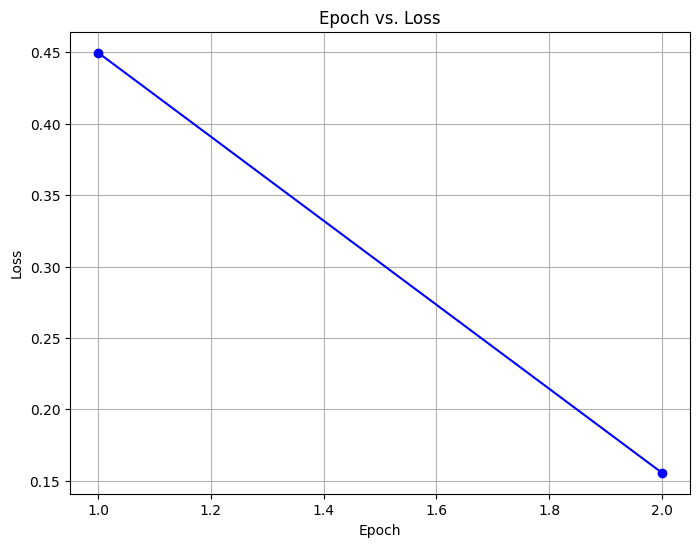

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), epoch_losses, marker='o', linestyle='-', color='b')
plt.title('Epoch vs. Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

**Model Evaluation**

In [ ]:
all_labels = []
all_preds = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device, dtype=torch.long)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())


correct = sum(p == l for p, l in zip(all_preds, all_labels))
total = len(all_labels)
accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=train_dataset.classes))


Test Accuracy: 95.85%
Classification Report:
              precision    recall  f1-score   support

      glioma       0.98      0.94      0.96       147
  meningioma       0.93      0.90      0.91       154
     notumor       0.96      1.00      0.98       203
   pituitary       0.97      0.99      0.98       147

    accuracy                           0.96       651
   macro avg       0.96      0.96      0.96       651
weighted avg       0.96      0.96      0.96       651



**Plot Confusion Matrix**

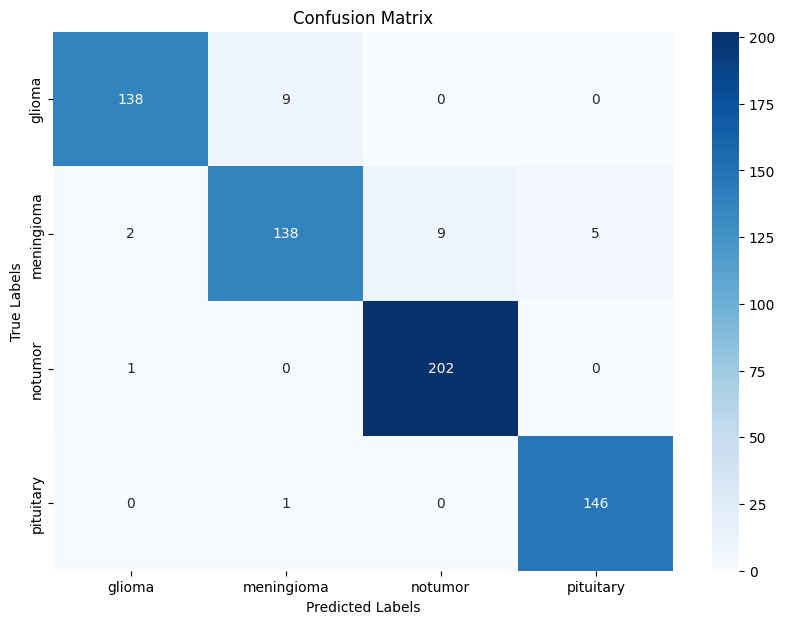

In [ ]:

cm = confusion_matrix(all_labels, all_preds)


plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


**Visualize predictions**

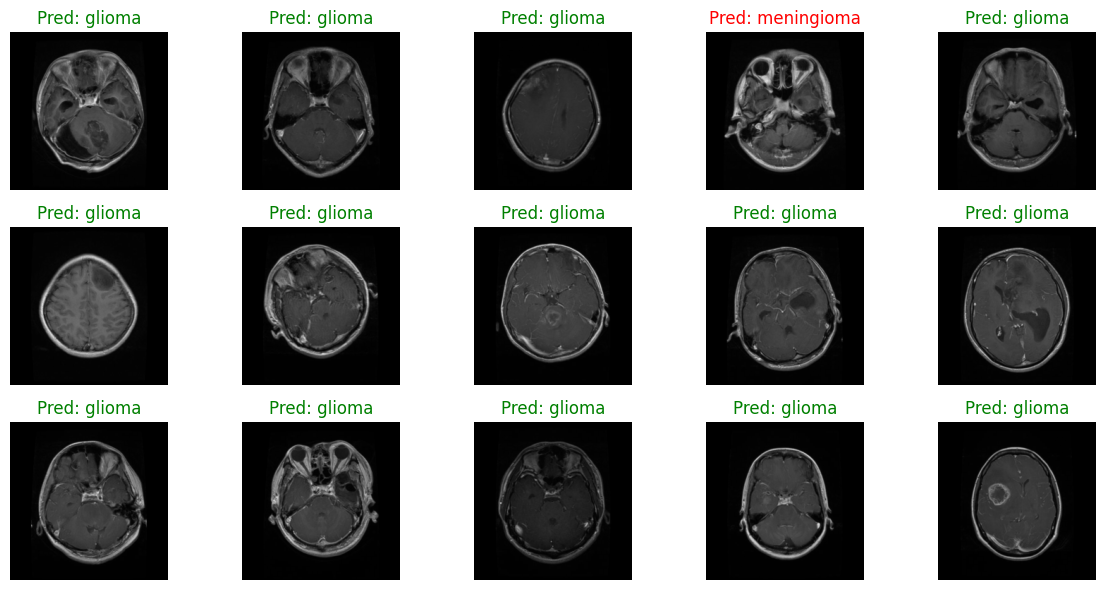

In [ ]:
data_iter = iter(test_loader)
images, labels = next(data_iter)
model.eval()
outputs = model(images.to(device))
_, preds = torch.max(outputs, 1)

fig, axes = plt.subplots(3, 5, figsize=(12, 6))
axes = axes.flatten()
for i in range(15):
    img = images[i].cpu().numpy().transpose(1, 2, 0)
    img = (img * 0.5) + 0.5
    axes[i].imshow(img.squeeze(), cmap='gray')
    axes[i].set_title(f"Pred: {train_dataset.classes[preds[i]]}",
                      color='green' if preds[i] == labels[i] else 'red')
    axes[i].axis("off")
plt.tight_layout()
plt.show()